In [1]:
import os
import time
import pandas as pd
import numpy as np
import datashader as ds
import datashader.transfer_functions as tf
from sklearn.cluster import KMeans, DBSCAN
import multiprocessing

In [2]:
# Navigate to data folder and get file
project = os.path.realpath('./..')
datadir = os.path.join(project, 'data')
datafile = os.path.join(datadir, 'tweets_1M.json')

In [3]:
## Save as HDF5 file for speed of access

# h5file = os.path.join(datadir, 'tweets_1M.h5')
# tweets = pd.read_json(datafile)
# tweets.to_hdf(h5file, 'tweets', mode='w')

In [4]:
# Load from HDF5 file

with pd.HDFStore(os.path.join(datadir, 'tweets_1M.h5')) as store:
    tweets = store.tweets

In [5]:
tweets.head()

,id,lat,lng,text,timeStamp,user_id
0,377652254096228352,37.446100,-121.883557,@Tanner_Cortez hey checkout the website: http:...,2013-09-11 04:38:08,224874450
1,377652255346159616,34.087406,-117.462604,@Lennayy7 😪,2013-09-11 04:38:08,312179473
2,377652262325456897,37.356131,-121.842867,i laugh a lot with that line,2013-09-11 04:38:10,54351774
3,377652264682655744,37.364664,-122.009629,sons of anarchy is back on woop woop,2013-09-11 04:38:11,343219606
4,377652271116722176,37.382600,-121.995000,Drinking a Fresh Squeezed IPA by @deschutesbee...,2013-09-11 04:38:12,1569395935


In [6]:
# Constrain to Bay Area

tweets = tweets.loc[
    (tweets.lat > 36.903929764) &
    (tweets.lat < 38.853939589) &
    (tweets.lng > -123.528897483) &
    (tweets.lng < -121.213352822)
]

In [7]:
# Subset to 100,000 records randomly
subset = tweets.sample(n=100000)

# Convert the lat and lng columns to numpy array
data = subset.as_matrix(columns=['lat', 'lng'])

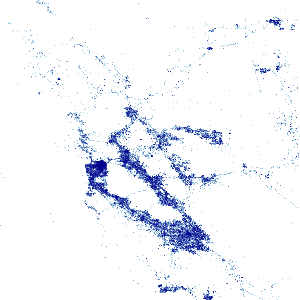

In [8]:
# Visualize points with datashader

cvs = ds.Canvas(plot_width=300, plot_height=300)
agg = cvs.points(subset, 'lng', 'lat')
tf.interpolate(agg)

In [9]:
# Prepare the k-means model object

k_means = KMeans(n_clusters=3,
                 init='k-means++',
                 n_init=10)

In [10]:
# Start timer
t0 = time.time()

# Fit the data and save timing
k_means.fit(data)
k_means_time = time.time() - t0
print k_means_time

# Add fitted label back into DataFrame
subset['cluster'] = k_means.labels_

0.746048927307


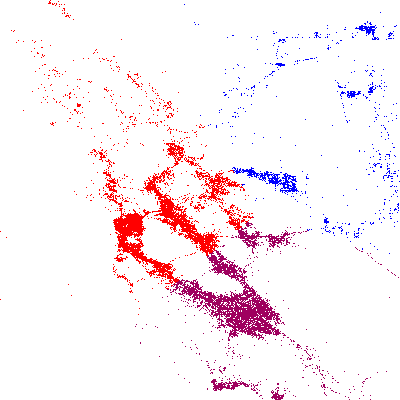

In [11]:
# Visualize points with datashader
cvs = ds.Canvas(plot_width=400, plot_height=400)
agg = cvs.points(subset, 'lng', 'lat', ds.mean('cluster'))
tf.interpolate(agg, cmap=['red', 'blue'])

In [22]:
# Test timing

timing = {}

def kmean_fit_timing(data, n):
    

    
    k_means = KMeans(n_clusters=n,
                 init='k-means++',
                 n_init=10)
    t0 = time.time()
    k_means.fit(data)
    t1 = time.time() - t0

    with open('timing.csv', mode='a') as timing:
        timing.write('{},'.format(t1))
    
    print n, t1
    return t1

for n in range(1, 10):
    # Start bar as a process
    p = multiprocessing.Process(target=kmean_fit_timing, args=(data, n))
    p.start()

    # Wait for 10 seconds or until process finishes
    p.join(1)

    # If thread is still active
    if p.is_alive():
        print "running... let's kill it..."

        # Terminate
        p.terminate()
        p.join()   
        break

1 0.079528093338
2 0.412147045135
3 0.58783698082
running... let's kill it...


In [ ]:
n = 60

k_means = KMeans(n_clusters=n,
             init='k-means++',
             n_init=10)
t0 = time.time()
k_means.fit(data)
print time.time() - t0

In [ ]:
n = 100

k_means = KMeans(n_clusters=n,
             init='k-means++',
             n_init=10)
t0 = time.time()
k_means.fit(data)
print time.time() - t0

In [ ]:

import time

# bar
def bar():
    for i in range(100):
        print "Tick"
        time.sleep(1)

if __name__ == '__main__':
    # Start bar as a process
    p = multiprocessing.Process(target=bar)
    p.start()

    # Wait for 10 seconds or until process finishes
    p.join(10)

    # If thread is still active
    if p.is_alive():
        print "running... let's kill it..."

        # Terminate
        p.terminate()
        p.join()